In [1]:
import sys

sys.path.append("../src")


import jax

In [2]:
jax.config.update("jax_platform_name", "cpu")  # Force CPU-only mode

In [3]:
# !pip install gymnax

In [4]:
from match_three_env.env import EnvParams, MatchThree

params = EnvParams()
env = MatchThree(params)

env.default_params

EnvParams(max_steps_in_episode=100, grid_params=MatchThreeGameGridParams(num_symbols=4, mask=Array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)), grid_size=(9, 9))

In [5]:
import jax.numpy as jnp
import matplotlib.pyplot as plt


def plot_grid(grid, ax, matches=None, vmin=None, vmax=None):
    ax.grid(color="white", linewidth=2)
    ax.set_xticks(jnp.arange(-0.5, 9.5, 1), [])
    ax.set_yticks(jnp.arange(-0.5, 9.5, 1), [])

    # TODO: this should be tested
    if matches is not None:
        # Highlight matched cells with red borders
        for i in range(len(matches)):
            for j in range(len(matches[0])):
                if matches[i, j]:
                    # Draw a red rectangle around the matched cell
                    ax.add_patch(
                        plt.Rectangle(
                            (j, i),
                            1,
                            1,
                            fill=False,
                            edgecolor="red",
                            lw=3,  # Border thickness
                        )
                    )

    ax.imshow(grid, vmin=vmin, vmax=vmax)

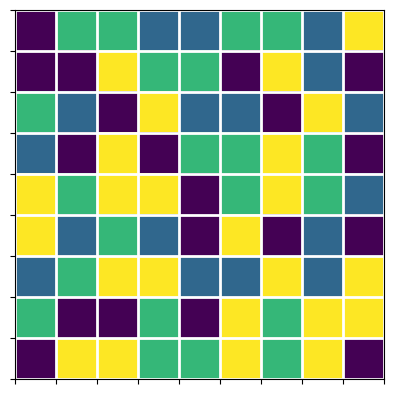

In [6]:
key = jax.random.PRNGKey(42)

key, subkey = jax.random.split(key)
obs, state = jax.jit(env.reset_env)(subkey, params)

plot_grid(obs, plt.gca())

In [7]:
print(obs.grid)

AttributeError: 'jaxlib.xla_extension.ArrayImpl' object has no attribute 'grid'

In [8]:
from match_three_env.utils import conv_action_to_swap_jit

position, direction = conv_action_to_swap_jit(params.grid_size, 69)
print(position, direction)
position, direction = conv_action_to_swap_jit(params.grid_size, 143)
print(position, direction)


[8 5] 3
[7 8] 2


1
1
3
Traced<ShapedArray(int32[9,9])>with<DynamicJaxprTrace>


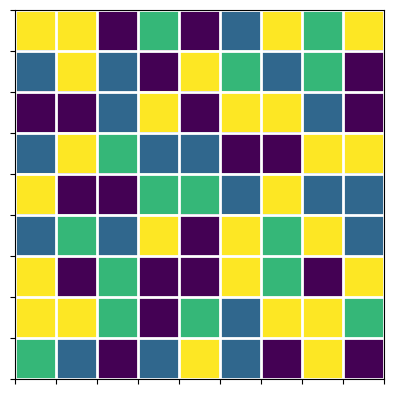

5 6.0


In [12]:
key, subkey = jax.random.split(key)

print(obs.grid[0, 0])
print(obs.grid[0, 1])
print(obs.grid[1, 0])

# NOTE: this is a very good move. 42 blocks gone with 5 cascades.
obs, state, reward, done = jax.jit(env.step_env)(
    key=subkey, state=state, action=72 + 9 + 3, params=params
)

plot_grid(obs.grid, plt.gca())
plt.show()
print(state.time, reward)